simple model to predict loan faurd decetection


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import io

data = """LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.1,High School,Unemployed,Single,Yes,No,Business,Yes,1
H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.2,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0
IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.8,PhD,Full-time,Divorced,No,No,Education,Yes,1
RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.2,Master's,Part-time,Divorced,No,No,Home,No,0
O5DM5MPPNA,41,74064,230883,432,31,2,5.0,60,0.89,Master's,Unemployed,Married,Yes,No,Auto,No,0"""

df = pd.read_csv(io.StringIO(data))
display(df.head())

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          16 non-null     object 
 1   Age             16 non-null     int64  
 2   Income          16 non-null     int64  
 3   LoanAmount      16 non-null     int64  
 4   CreditScore     16 non-null     int64  
 5   MonthsEmployed  16 non-null     int64  
 6   NumCreditLines  16 non-null     int64  
 7   InterestRate    16 non-null     float64
 8   LoanTerm        16 non-null     int64  
 9   DTIRatio        16 non-null     float64
 10  Education       16 non-null     object 
 11  EmploymentType  16 non-null     object 
 12  MaritalStatus   16 non-null     object 
 13  HasMortgage     16 non-null     object 
 14  HasDependents   16 non-null     object 
 15  LoanPurpose     16 non-null     object 
 16  HasCoSigner     16 non-null     object 
 17  Default         16 non-null     int64

### Preprocessing Categorical Features

Many machine learning models require numerical input. We'll use one-hot encoding to convert categorical features (columns with `object` dtype) into a numerical format. This creates new binary columns for each category, indicating the presence or absence of that category.

In [7]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,False,False,False,True,True,False,False,False,True,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,True,False,False,False,False,False,False,True,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,True,False,False,True,True,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,True,False,False,False,True,False,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,True,False,False,False,True,False,False,False,False,False


### Preparing Data for Modeling: Features, Target, and Train-Test Split

Before training a machine learning model, we must define which columns will be used as features (independent variables, X) and which column is our target (dependent variable, y). After this, we split the data into training and testing sets to evaluate the model's performance on unseen data.

In [10]:
# Define features (X) and target (y)
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11, 39)
Shape of X_test: (5, 39)
Shape of y_train: (11,)
Shape of y_test: (5,)


### Model Evaluation: Accuracy Score and Classification Report

To evaluate the performance of our Decision Tree Classifier, we will use common metrics such as accuracy score and a classification report. The accuracy score tells us the proportion of correctly classified instances, while the classification report provides more detailed insights into precision, recall, and F1-score for each class.

In [11]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



### Training a Decision Tree Classifier

We will now train a Decision Tree Classifier on our preprocessed training data. After training, we will use the model to make predictions on the test set to evaluate its performance.

In [9]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Predictions on the test set:", y_pred)

Predictions on the test set: [0 0 1 0 0]


### Cross-Validation for Robust Model Evaluation

To get a more reliable estimate of our model's performance and reduce the variance associated with a single train-test split, we will perform k-fold cross-validation. This technique involves splitting the data into 'k' folds, training the model 'k' times (each time using a different fold as the test set and the remaining folds as the training set), and then averaging the performance metrics.

In [12]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation of CV accuracy: {cv_scores.std():.2f}")

Cross-validation scores: [0.75       0.66666667 0.66666667 0.66666667 0.66666667]
Mean CV accuracy: 0.68
Standard deviation of CV accuracy: 0.03


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


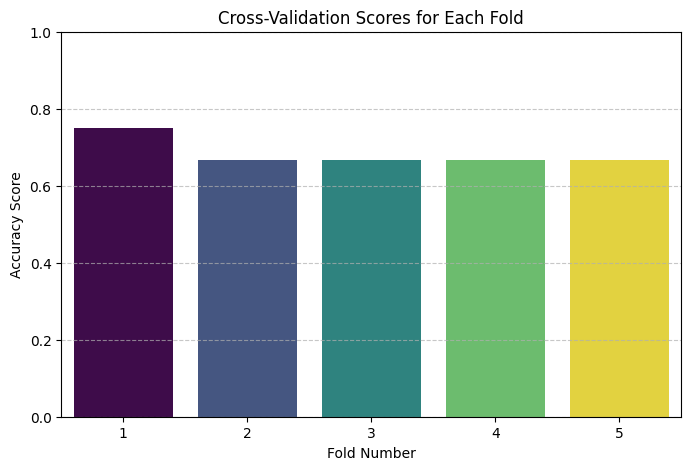

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(1, len(cv_scores) + 1), y=cv_scores, hue=np.arange(1, len(cv_scores) + 1), palette='viridis', legend=False)
plt.title('Cross-Validation Scores for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()